## Seleccion de modelos

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import FunctionTransformer
Log10 = FunctionTransformer(np.log10, validate=True)

In [103]:
df = pd.read_csv('/home/dipa/proyectos/7506-Organizacion-de-Datos/tp_2/notebooks/feature_sample_test.csv', index_col=0)

In [104]:
df.columns

Index(['Opportunity_ID', 'Total_Taxable_Amount', 'Region', 'antiguedad_cuenta',
       'tiempo_entrega_max', 'Pricing_Delivery_Terms_Approved',
       'Pricing_Delivery_Terms_Quote_Appr', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval', 'Month'],
      dtype='object')

In [67]:
ID = df.loc[:, 'Opportunity_ID']
X = df.drop(['Opportunity_ID','Target'], axis=1)
y = df[['Target']].values.ravel()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
X_train.columns

Index(['Total_Taxable_Amount', 'Region', 'antiguedad_cuenta',
       'tiempo_entrega_max', 'Pricing_Delivery_Terms_Approved',
       'Pricing_Delivery_Terms_Quote_Appr', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval', 'Month',
       'random_feature'],
      dtype='object')

In [45]:
features_list = []


regions = ['APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']
features_bool = ['Pricing, Delivery_Terms_Approved', 'Pricing, Delivery_Terms_Quote_Appr',
                    'Bureaucratic_Code_0_Approval',
                    'Bureaucratic_Code_0_Approved','Submitted_for_Approval']

features_list.append('Total_Taxable_Amount')
features_list = features_list + regions
features_list = features_list + ['antiguedad_cuenta', 'tiempo_entrega_max']
features_list = features_list + features_bool
features_list.append('Month')
features_list.append('random_feature')

len(features_list)
features_list

['Total_Taxable_Amount',
 'APAC',
 'Americas',
 'EMEA',
 'Japan',
 'Middle East',
 'antiguedad_cuenta',
 'tiempo_entrega_max',
 'Pricing, Delivery_Terms_Approved',
 'Pricing, Delivery_Terms_Quote_Appr',
 'Bureaucratic_Code_0_Approval',
 'Bureaucratic_Code_0_Approved',
 'Submitted_for_Approval',
 'Month',
 'random_feature']

In [46]:
X_train.columns


Index(['Total_Taxable_Amount', 'Region', 'antiguedad_cuenta',
       'tiempo_entrega_max', 'Pricing_Delivery_Terms_Approved',
       'Pricing_Delivery_Terms_Quote_Appr', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval', 'Month',
       'random_feature'],
      dtype='object')

In [105]:
X = df.drop('Opportunity_ID', axis=1)

In [106]:
X.columns

Index(['Total_Taxable_Amount', 'Region', 'antiguedad_cuenta',
       'tiempo_entrega_max', 'Pricing_Delivery_Terms_Approved',
       'Pricing_Delivery_Terms_Quote_Appr', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval', 'Month'],
      dtype='object')

### Random Forest

#### Hyperparametros

*   **n_estimators**: cantidad de árboles a construir (100)
*   **max_depth**: máxima profundidad de cada árbol
*   **min_samples_split**: la cantidad mínima de datos requeridos para splitear un nodo interno (2)
*   **min_samples_leaf**: cantidad mínima de datos requeridos para ser una hoja (1)
*   **max_features**: la cantidad de features a considerar cuando se busca el mejor split (n)

In [47]:
column_transformer = ColumnTransformer(
                        [
                            ("total_Taxable_Amount", Log10, [0]),
                            ("Region", OneHotEncoder(),[1]),
                            ('binning', KBinsDiscretizer(n_bins=20, strategy='quantile',encode='ordinal'), [2,3])
                        ], remainder= 'passthrough'
                      )


pipeline = Pipeline([
    ('ct',column_transformer),
    #('rf_clf', RandomForestRegressor(random_state=1, n_estimators=5))
    #('rf_clf', RandomForestRegressor(random_state=1, n_estimators=5, max_features=10))
    ('rf_clf', RandomForestClassifier(random_state=1, n_estimators=100, max_depth=10, min_samples_split=5, max_features=6))
    #('rf_clf', RandomForestRegressor(random_state=1, n_estimators=1, min_samples_split=20))
    #('xgb_clf' , xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
    #('xgb_clf' , xgb.XGBClassifier(objective = 'binary:logitraw', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100))
    #('xgb_clf' , xgb.XGBClassifier(objective='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 10, alpha = 3, n_estimators = 10000))
    #('rf_clf',RandomForestRegressor(random_state=1))
])


In [48]:
pipeline.fit(X_train,y_train)

/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('total_Taxable_Amount',
                                                  FunctionTransformer(func=<ufunc 'log10'>,
                                                                      validate=True),
                                                  [0]),
                                                 ('Region', OneHotEncoder(),
                                                  [1]),
                                                 ('binning',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=20),
                                                  [2, 3])])),
                ('rf_clf',
                 RandomForestClassifier(max_depth=10, max_features=6,
                                        min_samples_split=5, random_state=1))])

In [49]:
pipeline.predict(X_train)


array([1, 1, 0, ..., 1, 1, 0])

In [50]:
print('train_auc:', roc_auc_score(y_train, pipeline.predict(X_train)))
print('test_auc:',  roc_auc_score(y_test, pipeline.predict(X_test)))

train_auc: 0.8831348452522183
test_auc: 0.8103493795652555


In [51]:
#pipeline.steps[1][1]#.feature_importances_
#pipeline.steps[1][1].estimators_
tree0 = pipeline.steps[1][1].estimators_[97]

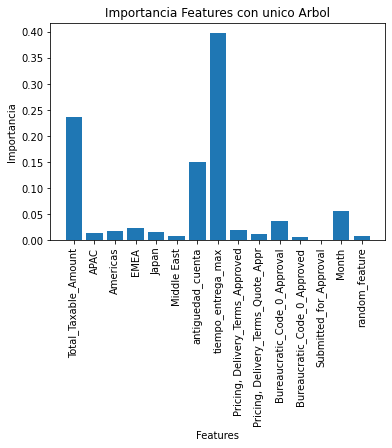

In [52]:
plt.bar(features_list, tree0.feature_importances_)
plt.xlabel('Features')
plt.xticks(rotation='vertical')
plt.ylabel('Importancia')
plt.title('Importancia Features con unico Arbol')
plt.show()

Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score


In [54]:
scores = cross_val_score(pipeline, X, y, cv=10, scoring='neg_log_loss')

/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning

In [55]:
scores

array([-0.38312608, -0.45533391, -0.42101372, -0.44423268, -0.46971554,
       -0.58066746, -0.51307805, -0.52026606, -0.52272062, -0.49989364])

In [56]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (-scores.mean(), scores.std()))


0.48 accuracy with a standard deviation of 0.05


In [70]:
pipeline.predict_proba(X)[:, -1]

array([0.08926738, 0.67461741, 0.66689019, ..., 0.20200355, 0.03585568,
       0.03467585])

In [93]:
df['PROBS'] = pd.Series(pipeline.predict_proba(X)[:, 1])
df[['Opportunity_ID','Target', 'PROBS']].tail(50)

/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/compose/_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


,Opportunity_ID,Target,PROBS
9791,12754,1,0.585312
9792,12755,1,0.073014
9793,12756,0,0.198153
9794,12757,0,0.677303
9795,12758,1,0.024801
9796,12759,0,0.015971
9797,12760,0,0.020444
9798,12761,0,0.399978
9799,12762,1,0.123952
9800,12763,0,0.301557


In [85]:
len(ID)


9840

In [81]:
pd.concat([ID, PROBS], axis=1).reset_index()


,index,Opportunity_ID,0
0,0,0.0,0.089267
1,1,1.0,0.674617
2,2,2.0,0.666890
3,3,3.0,0.025557
4,4,4.0,0.025422
...,...,...,...
9836,9836,12799.0,0.038724
9837,9837,12800.0,0.202004
9838,9838,12801.0,0.035856
9839,9839,12802.0,0.034676


In [107]:
#df['PROBS'] = pd.Series(pipeline.predict_proba(df)[:, 1])
#df[['Opportunity_ID','PROBS']]
pd.Series(pipeline.predict_proba(X))

ValueError: Number of features of the input must be equal to or greater than that of the fitted transformer. Transformer n_features is 11 and input n_features is 10.

### XGBoost

* **learning_rate:** tasa de aprendizaje
* **max_depth:** máxima profundidad de cada árbol
* **subsample:** porcentaje de muestras usadas para cada árbol (valor muy bajo, posible underfitting)
* **colsample_bytree:** porcentaje de features usadas para cada árbol (valores muy alto, posible overfitting)
* **n_estimators:** cantidad de árboles a construir.
* **objective:** función de error a utilizar (algunas: reg:squarederror para regresión, reg:logistic o binary:logistic para clasificación)

Parámetros de regularización:

* **gamma:** umbral para hacer split basado en la reducción de error de hacer el nuevo split.
* **alpha:** regularización para los pesos de las hojas. Un valor más alto genera una mayor regularización.
* **lambda:** similar alpha pero para la sintonia fina.

In [207]:
column_transformer = ColumnTransformer(
                        [
                            ("total_Taxable_Amount", Log10, [0]),
                            ("Region", OneHotEncoder(),[1]),
                            ('binning', KBinsDiscretizer(n_bins=20, strategy='quantile',encode='ordinal'), [2,3])
                        ], remainder= 'passthrough'
                      )


pipeline = Pipeline([
    ('ct',column_transformer),
    ('xgb_clf' , xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 5, alpha = 3, n_estimators = 100))
    #('xgb_clf' , xgb.XGBClassifier(objective = 'binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100))
    #('xgb_clf' , xgb.XGBClassifier(objective='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 10, alpha = 3, n_estimators = 10000))
])

pipeline.fit(X_train,y_train)


print('train_auc:', roc_auc_score(y_train, pipeline.predict(X_train)))
print('test_auc:',  roc_auc_score(y_test, pipeline.predict(X_test)))

/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train_auc: 0.8239866125707139
test_auc: 0.7928197828389829


### Cross validation

In [29]:
column_transformer = ColumnTransformer(
                        [
                            ("total_Taxable_Amount", Log10, [0]),
                            ("Region", OneHotEncoder(),[1]),
                            ('binning', KBinsDiscretizer(n_bins=20, strategy='quantile',encode='ordinal'), [2,3])
                        ], remainder= 'passthrough'
                      )



pipeline = Pipeline([
    ('ct',column_transformer),
    ('xgb_clf' , xgb.XGBClassifier(objective='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 10, alpha = 3, n_estimators = 10000))
])



In [30]:
scores = cross_val_score(pipeline, X, y, cv=10, scoring='neg_log_loss')

/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:45:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:45:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:45:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:45:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:45:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/dipa/proyectos/7506-Organizacion-de-Datos/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:47:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [31]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (-scores.mean(), scores.std()))


0.54 accuracy with a standard deviation of 0.07
